# 데이터 시각화의 기본 조건
- 목적에 맞는 그래프 선정
  + 선형 그래프, 막대 그래프, 산점도, 박스플롯 등등
- 환경에 맞는 도구 선택
  + 코드 기반 : R, Python
  + 프로그램 기반 : Excel, PowerBI, Tableau 등등
- 문맥(도메인)에 맞는 색과 도형 사용

# 파이썬 시각화 라이브러리

## Matplotlib
- 정형 데이터  / 이미지 데이터
- Pyplot API : Pyplot 모듈에 있는 함수를 각각 불러와서 구현
  + 사용하기 편리하나, 세부 옵션 조정이 어려움
- 객체지향 API : Matplotlib에 구현된 객체지향 라이브러리를 직접 활용
  + 라이브러리가 늘어나고, 코드가 복잡함
  + 그래프의 디테일한 세부 옵션 조정이 용이함
- 일반적으로 두 API를 혼합하여 사용

## Seaborn
- Matplotlib에 종속된 라이브러리
- Matplotlib에 비해 코드가 간결함
- 통계 그래프 구현이 보다 용이
- 세부적인 옵션은 Matplotlib에서 조정

# 라이브러리 불러오기

In [ ]:
import matplotlib
import seaborn as sns
print("matplotlib ver :", matplotlib.__version__)
print("seaborn ver :", sns.__version__)

matplotlib ver : 3.2.2
seaborn ver : 0.11.2


# 시각화 테스트

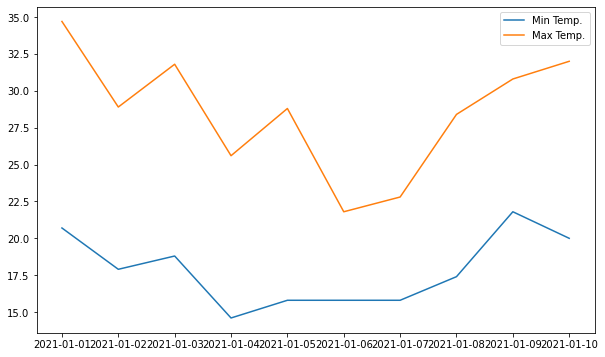

In [ ]:
import matplotlib.pyplot as plt

dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# 파이썬 시각화 수행 전 기본 설정 (숫자는 변경 가능)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ax.plot(dates, min_temperature, label = "Min Temp.")
ax.plot(dates, max_temperature, label = "Max Temp.")
ax.legend()
plt.show()

# 주식 데이터 예제

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf
data = yf.download("AAPL", start="2019-08-01", end="2022-03-23")
ts = data['Open']
print(ts.head())
print(type(ts))

[*********************100%***********************]  1 of 1 completed
Date
2019-08-01    53.474998
2019-08-02    51.382500
2019-08-05    49.497501
2019-08-06    49.077499
2019-08-07    48.852501
Name: Open, dtype: float64
<class 'pandas.core.series.Series'>


## pyplot 모듈

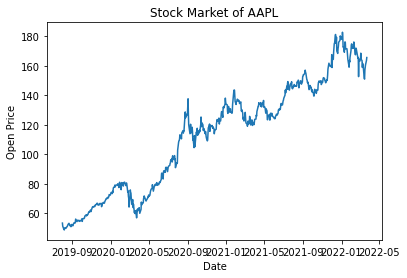

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ts)

plt.title("Stock Market of AAPL")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

## 객체지향 라이브러리

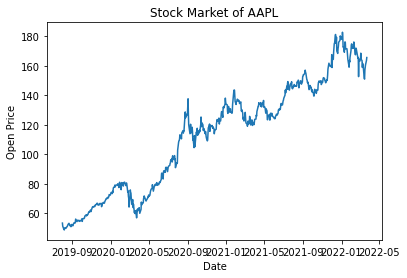

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(ts)

ax.set_title("Stock Market of AAPL")
ax.set_xlabel("Date")
ax.set_ylabel("Open Price")
plt.show()

# 막대 그래프

## Matplotlib

barplots : <BarContainer object of 12 artists>
Rectangle(xy=(0.6, 0), width=0.8, height=300, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=400, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=550, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=900, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=600, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=960, angle=0)
Rectangle(xy=(6.6, 0), width=0.8, height=900, angle=0)
Rectangle(xy=(7.6, 0), width=0.8, height=910, angle=0)
Rectangle(xy=(8.6, 0), width=0.8, height=800, angle=0)
Rectangle(xy=(9.6, 0), width=0.8, height=700, angle=0)
Rectangle(xy=(10.6, 0), width=0.8, height=550, angle=0)
Rectangle(xy=(11.6, 0), width=0.8, height=450, angle=0)


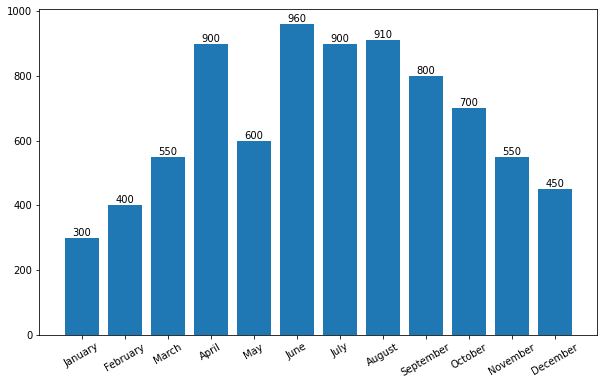

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

fig, ax = plt.subplots(figsize=(10,6))
barplots = ax.bar(month_list, sold_list)
print("barplots :", barplots) # artists 레이어에 12개의 막대가 저장됨

for plot in barplots:
  print(plot)
  # print(plot.get_x())
  # print(plot.get_y())
  # print(plot.get_width())
  # print("height:", plot.get_height())
  height = plot.get_height()
  ax.text(plot.get_x() + plot.get_width()/2, height, height, ha = 'center', va = 'bottom')

plt.xticks(month_list, calendar.month_name[1:13], rotation=30) # x축
plt.show()

## Seaborn

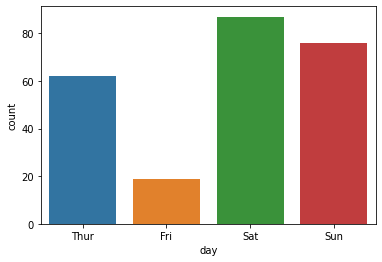

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x="day", data=tips)
plt.show()

In [ ]:
print(tips['day'].value_counts().index)
print(tips['day'].value_counts().values)
print()
print(tips['day'].value_counts(ascending=True))

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
[87 76 62 19]

Fri     19
Thur    62
Sun     76
Sat     87
Name: day, dtype: int64


Rectangle(xy=(-0.4, 0), width=0.8, height=87, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=76, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=62, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=19, angle=0)


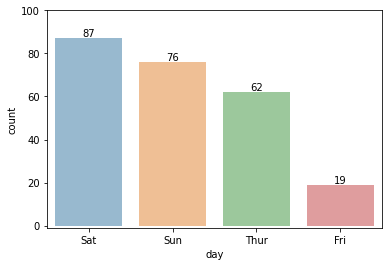

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x="day", data=tips, order=tips['day'].value_counts().index, alpha=0.5)

for plot in ax.patches:
  print(plot)
  height = plot.get_height()
  ax.text(plot.get_x() + plot.get_width()/2, height, height, ha = 'center', va = 'bottom')

ax.set_ylim(-1, 100)
plt.show()

# 산점도

## Matplotlib

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


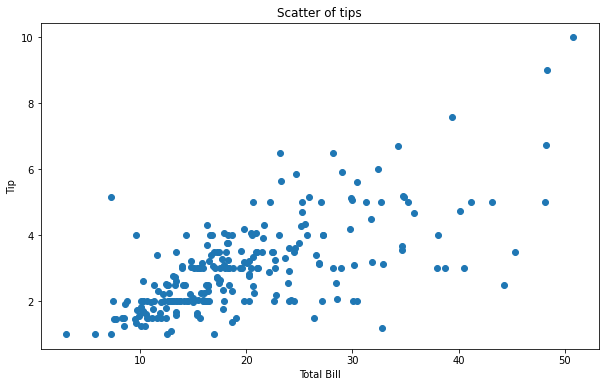

In [ ]:
import seaborn as sns

tips = sns.load_dataset("tips")
print(tips.info())

x = tips['total_bill']
y = tips['tip']

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x,y)
ax.set_title('Scatter of tips')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

plt.show()

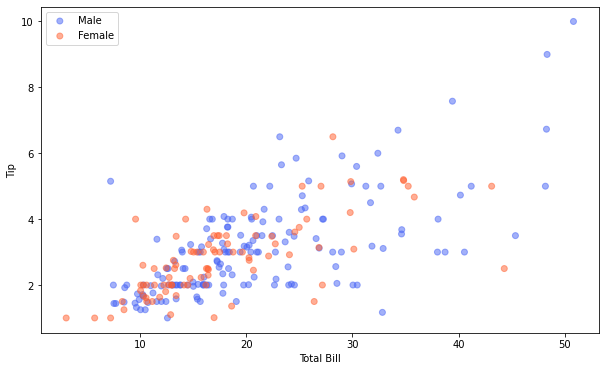

In [ ]:
tips['sex_color'] = tips['sex'].map({'Male':'#4663F5', 'Female':'#FF5F2E'})

fig, ax = plt.subplots(figsize=(10,6))
for label, data in tips.groupby('sex'):
  ax.scatter(data['total_bill'], data['tip'], label=label, color=data['sex_color'], alpha=0.5)
  ax.set_xlabel('Total Bill')
  ax.set_ylabel('Tip')

ax.legend()
plt.show()

## Seaborn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


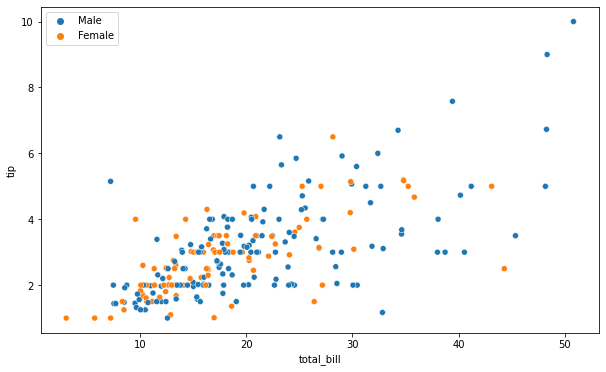

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
print(tips.info())

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
ax.legend()
plt.show()

# 두 개의 그래프를 동시에 표현

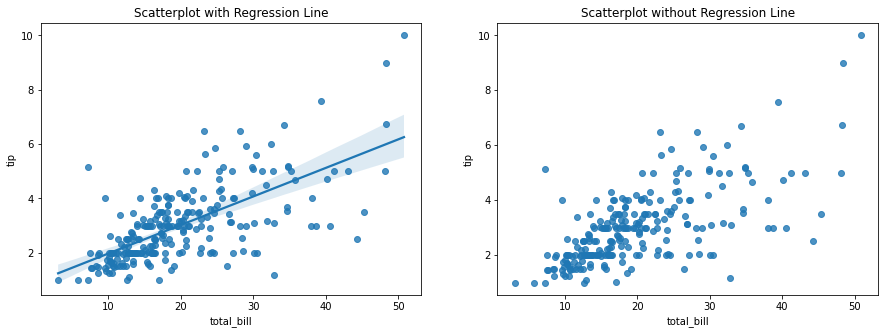

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title("Scatterplot with Regression Line")
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title("Scatterplot without Regression Line")
plt.show()

# 종합 예제

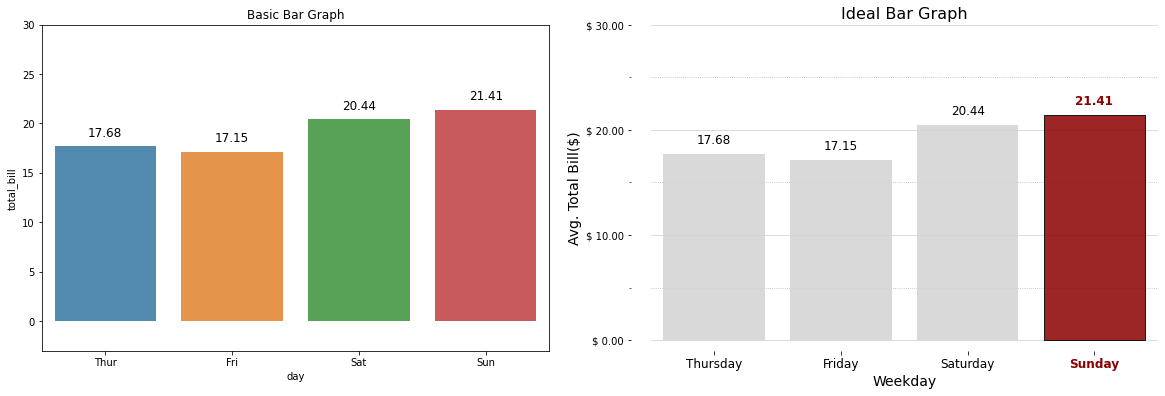

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)

def major_formatter(x, pos):
  return "$ %.2f" % x

formatter = FuncFormatter(major_formatter)

tips = sns.load_dataset("tips")
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

### 왼쪽 막대 그래프
ax0 = sns.barplot(x="day", y='total_bill', data=tips, ax=ax[0],
                  ci=None, alpha=0.85)

# 텍스트 입력
for p in ax0.patches:
  height = np.round(p.get_height(), 2)
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)

# 축 범위 및 제목 수정
ax0.set_ylim(-3, 30)
ax0.set_title("Basic Bar Graph")


### 왼쪽 막대 그래프
ax1 = sns.barplot(x="day", y="total_bill", data=tips, ax=ax[1],
                  ci=None, color='lightgray', alpha=0.85, zorder=2)


# total_bill 평균이 가장 큰 요일
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
h_day = group_mean.sort_values(ascending=False).index[0] # sunday
h_mean = group_mean.sort_values(ascending=False).values[0] # 21.41

# 막대별 옵션 설정
for plot in ax1.patches:
  height = np.round(plot.get_height(), 2)
  
  # 기본 설정
  fontweight = "normal"
  color = "k"

  # 조건 설정
  if h_mean == height:
    fontweight = "bold"
    color = "darkred"
    plot.set_facecolor(color)
    plot.set_edgecolor("black")

  # 텍스트 입력
  ax1.text(plot.get_x() + plot.get_width()/2., height+1, height,
           ha ='center', size=12, fontweight=fontweight, color=color)


# spines 제거
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_position(("outward", 20))
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# 축 범위 및 제목 수정
ax1.set_ylim(-1, 30)
ax1.set_title("Ideal Bar Graph", size=16)

ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_minor_locator(MultipleLocator(5))

# 축 레이블 수정
ax1.set_ylabel("Avg. Total Bill($)", fontsize=14)
ax1.set_xlabel("Weekday", fontsize=14)

# 그리드
ax1.grid(axis="y", which="major", color="lightgray")
ax1.grid(axis="y", which="minor", ls=":")

# 축 범주 수정
for xtick in ax1.get_xticklabels():
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")

ax1.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)


plt.show()